In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

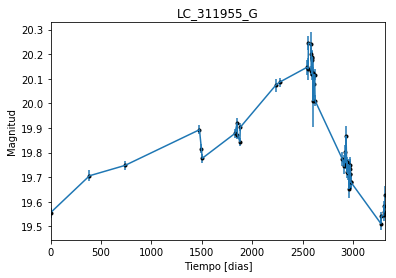

In [2]:
data = np.genfromtxt('LC_311955_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_311955_G')
plt.savefig("LC_311955_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

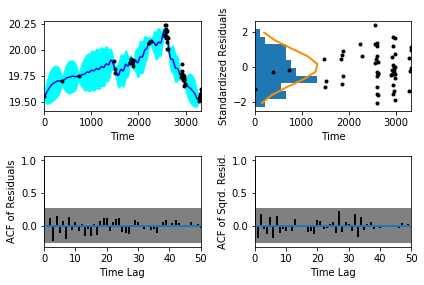

In [5]:
sample.assess_fit()

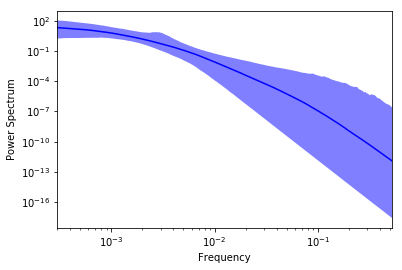

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

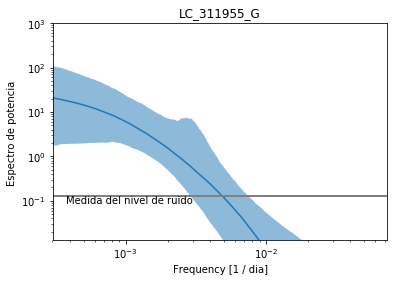

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_311955_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_311955_G')

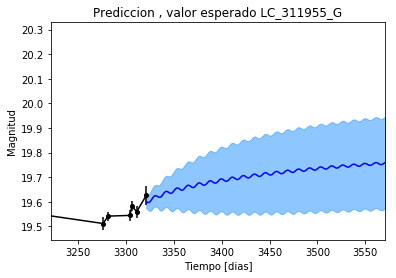

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_311955_G')

Text(0.5,1,'Prediccion, Caminos simulados_LC_311955_G')

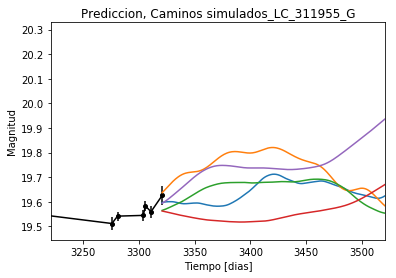

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_311955_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


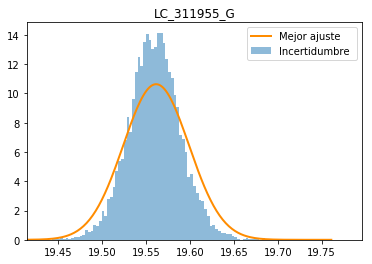

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_311955_G')
plt.savefig("Mejor_ajuste_LC_311955_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_311955_G')

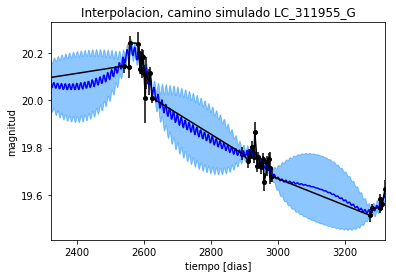

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_311955_G')

Text(0.5,1,'Interpolacion, camino simulado LC_311955_G')

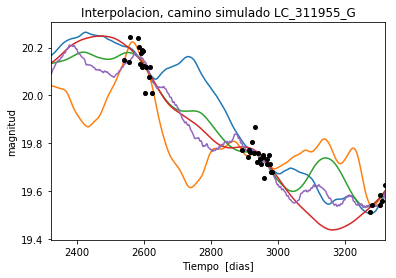

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_311955_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 666.451423373
Median: 0.00889860758027
Standard deviation: 0.190797322458
68% credibility interval: [ 0.00096044  0.1724664 ]
95% credibility interval: [  3.68898875e-04   7.48135058e-01]
99% credibility interval: [  3.11686608e-04   9.52404889e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 308.227911246
Median: 0.00181652804482
Standard deviation: 0.0612403438996
68% credibility interval: [ 0.00047098  0.01483285]
95% credibility interval: [ 0.00032     0.18648345]
99% credibility interval: [  3.05558136e-04   4.32602146e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 403.630102325
Median: 0.0155689784695
Standard

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 2112.69119391
Median: 100.190161895
Standard deviation: 1.67382981876
68% credibility interval: [  98.27782451  101.39876112]
95% credibility interval: [  95.7489134   102.07037233]
99% credibility interval: [  93.77778702  102.56746654]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 355.982927879
Median: 0.578480314914
Standard deviation: 2.00141915566
68% credibility interval: [ 0.05118923  3.75873561]
95% credibility interval: [ 0.01523758  6.67018307]
99% credibility interval: [ 0.00997984  8.30002262]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 413.470181437
Median: 0.327799506171
Standard deviation: 6.8397631227
68% credibility interval: [ 0.01047349  4.78797074]
95% credibility interval: [  7.79180743e-04

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 2179.18876188
Median: 2.19021291856e-56
Standard deviation: 1.27944762234e+145
68% credibility interval: [  6.17076611e-99   1.79408077e-23]
95% credibility interval: [  9.71142977e-157   2.58379160e+106]
99% credibility interval: [  3.53238821e-171   4.75220773e+145]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2610.22892308
Median: 19.7844925928
Standard deviation: 0.108649398067
68% credibility interval: [ 19.69121065  19.87627033]
95% credibility interval: [ 19.57451455  19.99499532]
99% credibility interval: [ 19.44211817  20.1337605 ]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 315.471654255
Median: 0.00345176296819
Standard deviation: 0.208540109973
68% credibility interval: [ 0.          0.23408027]
95% credibility interval: [ 0.          0.81132613]
99% credibility interval: [ 0.        1.000462]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 315.471654255
Median: 0.00345176296819
Standard deviation: 0.208540109973
68% credibility interval: [ 0.          0.23408027]
95% credibility interval: [ 0.          0.81132613]
99% credibility interval: [ 0.        1.000462]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1184.5233431
Median: 0.0
Standard deviation: 0.000551762809454
68% credibili

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 2112.69119391
Median: 100.190161895
Standard deviation: 1.67382981876
68% credibility interval: [  98.27782451  101.39876112]
95% credibility interval: [  95.7489134   102.07037233]
99% credibility interval: [  93.77778702  102.56746654]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1714.46375568
Median: 0.0448759313152
Standard deviation: 0.0527895937598
68% credibility interval: [ 0.02784267  0.08331606]
95% credibility interval: [ 0.01907435  0.17940921]
99% credibility interval: [ 0.01546505  0.35280034]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1352.77352013
Median: 1.28951731167
Standard deviation: 0.210674981805
68% credibility interval: [ 1.09765265  1.51073787]
95% credibility interval: [ 0.93418749  1.77233705]
99% credibility interval: [ 0.82465133  1.92890401]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1014.70425309
Median: 0.000125032016091
Standard deviation: 0.0191407636472
68% credibility interval: [  2.43443133e-06   3.30365868e-03]
95% credibility interval: [  4.73460642e-112   3.87928177e-002]
99% credibility interval: [  4.57632603e-151   1.14779782e-001]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 666.451423373
Median: (-0.0559116004027-3.00223457241j)
Standard deviation: 1.77595981304
68% credibility interval: [-1.08363834+0.j         -0.00603459-1.07480496j]
95% credibility interval: [ -4.70067120e+00-1.34034145j  -2.31785999e-03-0.70295607j]
99% credibility interval: [ -5.98413641e+00+0.j          -1.95838472e-03-0.03510863j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 308.227911246
Median: (-0.0114135823213+0.0570075289102j)
Standard deviation: 1.36562625577
68% credibility interval: [-0.09319752+3.36833833j -0.00295924+0.00541104j]
95% credibility interval: [-1.17171010+3.67792804j -0.00201064+0.j        ]
99% credibility interval: [ -2.71811945e+00+5.5737925j  -1.91987839e-03+0.j       ]
Posterior summ